In [1]:
import pandas as pd
import numpy as np

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#`ImageDataGenerator` is configured to perform data augmentation on the input images during the training process

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

training_set = train_datagen.flow_from_directory('./Skin_Data/Cancer_Non_Cancer/train',
                                                 target_size = (64,64),
                                                 batch_size = 7,
                                                 class_mode = 'binary')

Found 204 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
test_set = test_datagen.flow_from_directory('./Skin_Data/Cancer_Non_Cancer/test',
                                                 target_size = (64,64),
                                                 batch_size = 7,
                                                 class_mode = 'binary')

Found 84 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [7]:
# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units= 128,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units= 1,activation='sigmoid'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [13]:
# Training the CNN
cnn.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 1000)

Epoch 1/1000


30/30 [==============================] - 4s 87ms/step - loss: 0.5524 - accuracy: 0.7794 - val_loss: 1.0319 - val_accuracy: 0.5000
Epoch 2/1000
30/30 [==============================] - 1s 30ms/step - loss: 0.5253 - accuracy: 0.7941 - val_loss: 0.7581 - val_accuracy: 0.5000
Epoch 3/1000
30/30 [==============================] - 1s 29ms/step - loss: 0.5172 - accuracy: 0.7941 - val_loss: 1.0531 - val_accuracy: 0.5000
Epoch 4/1000
30/30 [==============================] - 1s 29ms/step - loss: 0.4902 - accuracy: 0.7941 - val_loss: 0.9556 - val_accuracy: 0.5000
Epoch 5/1000
30/30 [==============================] - 1s 29ms/step - loss: 0.4360 - accuracy: 0.7990 - val_loss: 0.6697 - val_accuracy: 0.5238
Epoch 6/1000
30/30 [==============================] - 1s 30ms/step - loss: 0.4347 - accuracy: 0.7941 - val_loss: 0.9551 - val_accuracy: 0.5238
Epoch 7/1000
30/30 [==============================] - 1s 30ms/step - loss: 0.4001 - accuracy: 0.7990 - val_loss: 0.6706 - val_accuracy: 0.59

In [64]:

test_image = tf.keras.utils.load_img('./Skin_Data/Cancer_Non_Cancer/test/Non_Cancer/434-2.JPG',target_size= (64,64))

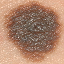

In [65]:
test_image

In [66]:
test_image = tf.keras.utils.img_to_array(test_image)

In [67]:
test_image = np.expand_dims(test_image,axis=0)
test_image

array([[[[227., 180., 150.],
         [221., 175., 142.],
         [233., 186., 156.],
         ...,
         [230., 179., 152.],
         [228., 179., 149.],
         [224., 177., 147.]],

        [[225., 181., 154.],
         [229., 186., 154.],
         [247., 203., 176.],
         ...,
         [227., 173., 145.],
         [230., 175., 145.],
         [228., 173., 143.]],

        [[218., 172., 139.],
         [233., 189., 162.],
         [224., 179., 150.],
         ...,
         [227., 171., 144.],
         [239., 185., 161.],
         [229., 175., 147.]],

        ...,

        [[218., 177., 145.],
         [222., 172., 145.],
         [232., 188., 159.],
         ...,
         [229., 184., 151.],
         [232., 188., 159.],
         [225., 184., 152.]],

        [[219., 180., 151.],
         [239., 198., 168.],
         [230., 190., 164.],
         ...,
         [245., 204., 174.],
         [228., 187., 157.],
         [232., 187., 156.]],

        [[245., 213., 188.],
       

In [68]:
result = cnn.predict(test_image)
result

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [69]:
if result[0][0] == 0:
  prediction = 'Cancer'
else:
  prediction = 'Non_Cancer'

print(prediction)

Non_Cancer


In [16]:
loss, accuracy = cnn.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


12/12 [==============================] - 0s 20ms/step - loss: 4.9773 - accuracy: 0.7143
Test Loss: 4.97725772857666
Test Accuracy: 0.7142857313156128


In [97]:
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=[64,64,3]))

# Pooling
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn2.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units= 128,activation='relu'))

cnn2.add(tf.keras.layers.Dense(units= 1,activation='sigmoid'))



In [98]:
# Training the CNN
cnn2.compile(optimizer='SGD',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [99]:
cnn2.fit(x = training_set, validation_data = test_set, epochs = 300)

Epoch 1/300
30/30 [==============================] - 1s 32ms/step - loss: 0.5569 - accuracy: 0.7647 - val_loss: 1.0616 - val_accuracy: 0.5000
Epoch 2/300
30/30 [==============================] - 1s 28ms/step - loss: 0.5128 - accuracy: 0.7941 - val_loss: 0.9192 - val_accuracy: 0.5000
Epoch 3/300
30/30 [==============================] - 1s 28ms/step - loss: 0.5007 - accuracy: 0.7941 - val_loss: 0.9957 - val_accuracy: 0.5000
Epoch 4/300
30/30 [==============================] - 1s 27ms/step - loss: 0.4998 - accuracy: 0.7941 - val_loss: 0.9150 - val_accuracy: 0.5000
Epoch 5/300
30/30 [==============================] - 1s 27ms/step - loss: 0.4906 - accuracy: 0.7941 - val_loss: 1.0966 - val_accuracy: 0.5000
Epoch 6/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4906 - accuracy: 0.7941 - val_loss: 0.9075 - val_accuracy: 0.5000
Epoch 7/300
30/30 [==============================] - 1s 26ms/step - loss: 0.4902 - accuracy: 0.7941 - val_loss: 0.7537 - val_accuracy: 0.5000
Epoch 

In [100]:
loss, accuracy = cnn2.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


12/12 [==============================] - 0s 22ms/step - loss: 1.3653 - accuracy: 0.7500
Test Loss: 1.3653244972229004
Test Accuracy: 0.75


In [103]:
cnn3 = tf.keras.models.Sequential()

cnn3.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=[64, 64, 3]))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn3.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn3.add(tf.keras.layers.Flatten())

cnn3.add(tf.keras.layers.Dense(128, activation='relu'))
cnn3.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [109]:
# Training the CNN
cnn3.compile(optimizer='SGD',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [110]:
cnn3.fit(x = training_set, validation_data = test_set, epochs = 300)

Epoch 1/300
30/30 [==============================] - 1s 34ms/step - loss: 0.5685 - accuracy: 0.7941 - val_loss: 0.8349 - val_accuracy: 0.5000
Epoch 2/300
30/30 [==============================] - 1s 27ms/step - loss: 0.5116 - accuracy: 0.7941 - val_loss: 0.9241 - val_accuracy: 0.5000
Epoch 3/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4997 - accuracy: 0.7941 - val_loss: 0.8830 - val_accuracy: 0.5000
Epoch 4/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4973 - accuracy: 0.7941 - val_loss: 1.1436 - val_accuracy: 0.5000
Epoch 5/300
30/30 [==============================] - 1s 27ms/step - loss: 0.5008 - accuracy: 0.7941 - val_loss: 0.8600 - val_accuracy: 0.5000
Epoch 6/300
30/30 [==============================] - 1s 27ms/step - loss: 0.4949 - accuracy: 0.7941 - val_loss: 0.9002 - val_accuracy: 0.5000
Epoch 7/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4942 - accuracy: 0.7941 - val_loss: 0.7555 - val_accuracy: 0.5000
Epoch 

In [111]:
loss, accuracy = cnn3.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


12/12 [==============================] - 0s 19ms/step - loss: 1.2975 - accuracy: 0.6667
Test Loss: 1.2974653244018555
Test Accuracy: 0.6666666865348816


In [112]:
cnn4 = tf.keras.models.Sequential()

cnn4.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=[64, 64, 3]))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn4.add(tf.keras.layers.Conv2D(16, 3, activation='relu',input_shape=[64, 64, 3]))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn4.add(tf.keras.layers.Flatten())

cnn4.add(tf.keras.layers.Dense(128, activation='relu'))
cnn4.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [113]:
# Training the CNN
cnn4.compile(optimizer='SGD',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [114]:
cnn4.fit(x = training_set, validation_data = test_set, epochs = 300)

Epoch 1/300
30/30 [==============================] - 1s 33ms/step - loss: 0.5547 - accuracy: 0.7696 - val_loss: 1.0262 - val_accuracy: 0.5000
Epoch 2/300
30/30 [==============================] - 1s 27ms/step - loss: 0.5064 - accuracy: 0.7941 - val_loss: 0.9331 - val_accuracy: 0.5000
Epoch 3/300
30/30 [==============================] - 1s 28ms/step - loss: 0.5010 - accuracy: 0.7941 - val_loss: 0.9396 - val_accuracy: 0.5000
Epoch 4/300
30/30 [==============================] - 1s 28ms/step - loss: 0.5024 - accuracy: 0.7941 - val_loss: 1.0503 - val_accuracy: 0.5000
Epoch 5/300
30/30 [==============================] - 1s 30ms/step - loss: 0.5046 - accuracy: 0.7941 - val_loss: 0.9061 - val_accuracy: 0.5000
Epoch 6/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4950 - accuracy: 0.7794 - val_loss: 0.6656 - val_accuracy: 0.6905
Epoch 7/300
30/30 [==============================] - 1s 29ms/step - loss: 0.4760 - accuracy: 0.7941 - val_loss: 1.0855 - val_accuracy: 0.5000
Epoch 

In [115]:
loss, accuracy = cnn4.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


12/12 [==============================] - 0s 23ms/step - loss: 1.2562 - accuracy: 0.7381
Test Loss: 1.2561672925949097
Test Accuracy: 0.738095223903656
